In [1]:
# чтобы изменения в других файлах автоматически подгружались в импорты
%load_ext IPython.extensions.autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')
from model import FinData
from model import train_valid_split
from model import CatboostFinModel

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

In [4]:
data = FinData("../../datasets/T_yandex_10min.csv")

data.restrict_time_down(months=6)

data.insert_shifts_norms()
data.insert_rolling_means()
data.insert_exp_rolling_means()
data.insert_stochastic_oscillator()
data.insert_high_low_diff()
data.insert_bollinger()


In [5]:
args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.01, # тут слегка неадекватные параметры, которые можно менять 
        "use_best_model" : True, 
        "reg_lambda" : 0.1, # L1
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : data.cat_features, 
        "random_state" : 42,
        "early_stopping_rounds" : 2500}


model = CatboostFinModel(args)
model.cat = data.cat_features
model.numeric = data.numeric_features

X, y = data.df[model.cat + model.numeric], data.df['direction_binary']

samples_list = [5, 10, 15]
answers = []
for i in samples_list:
        answers.append(model.cross_validation(X, y, n_samples=i))

for i, n in enumerate(samples_list):
        print(f"N_samples: {n} - avg accuracy {answers[i]}")

0:	learn: 0.6051937	test: 0.5589789	best: 0.5589789 (0)	total: 196ms	remaining: 32m 39s
1000:	learn: 0.8551937	test: 0.5629401	best: 0.5827465 (211)	total: 5.69s	remaining: 51.2s
2000:	learn: 0.9555458	test: 0.5550176	best: 0.5827465 (211)	total: 10.8s	remaining: 43s
Stopped by overfitting detector  (2500 iterations wait)

bestTest = 0.5827464789
bestIteration = 211

Shrink model to first 212 iterations.
0:	learn: 0.5875880	test: 0.5787852	best: 0.5787852 (0)	total: 11.4ms	remaining: 1m 54s
1000:	learn: 0.7585827	test: 0.5748239	best: 0.5915493 (284)	total: 5.8s	remaining: 52.2s
2000:	learn: 0.8653169	test: 0.5695423	best: 0.5915493 (284)	total: 11.4s	remaining: 45.5s
Stopped by overfitting detector  (2500 iterations wait)

bestTest = 0.5915492958
bestIteration = 284

Shrink model to first 285 iterations.
0:	learn: 0.5837735	test: 0.6034331	best: 0.6034331 (0)	total: 9.69ms	remaining: 1m 36s
1000:	learn: 0.7177230	test: 0.5897887	best: 0.6043134 (95)	total: 7.22s	remaining: 1m 4s
2000:

In [7]:
data.insert_random_prediction()

model = CatboostFinModel(args)
model.cat = data.cat_features
model.numeric = data.numeric_features

X, y = data.df[model.cat + model.numeric], data.df['direction_binary']

samples_list = [5, 10, 15]
answers = []
for i in samples_list:
        answers.append(model.cross_validation(X, y, n_samples=i))

for i, n in enumerate(samples_list):
        print(f"N_samples: {n} - avg accuracy {answers[i]}")

0:	learn: 0.6051937	test: 0.5589789	best: 0.5589789 (0)	total: 8.43ms	remaining: 1m 24s
1000:	learn: 0.8551937	test: 0.5629401	best: 0.5827465 (211)	total: 7.85s	remaining: 1m 10s
2000:	learn: 0.9555458	test: 0.5550176	best: 0.5827465 (211)	total: 21.9s	remaining: 1m 27s
Stopped by overfitting detector  (2500 iterations wait)

bestTest = 0.5827464789
bestIteration = 211

Shrink model to first 212 iterations.
0:	learn: 0.5875880	test: 0.5787852	best: 0.5787852 (0)	total: 17.3ms	remaining: 2m 52s
1000:	learn: 0.7585827	test: 0.5748239	best: 0.5915493 (284)	total: 16.2s	remaining: 2m 25s
2000:	learn: 0.8653169	test: 0.5695423	best: 0.5915493 (284)	total: 34.2s	remaining: 2m 16s
Stopped by overfitting detector  (2500 iterations wait)

bestTest = 0.5915492958
bestIteration = 284

Shrink model to first 285 iterations.
0:	learn: 0.5837735	test: 0.6034331	best: 0.6034331 (0)	total: 20.1ms	remaining: 3m 21s
1000:	learn: 0.7177230	test: 0.5897887	best: 0.6043134 (95)	total: 20.5s	remaining: 3m 4

In [8]:
data = FinData("../../datasets/T_yandex_10min.csv")
data.insert_shifts_norms([3, 6, 18])
data.insert_rolling_means()
data.insert_exp_rolling_means()
data.insert_stochastic_oscillator()
data.insert_high_low_diff()
data.insert_butter_filter()

data.restrict_time_down(months=12)

In [10]:
data.df.shape

(28013, 53)

In [11]:
numeric = data.numeric_features

cat = data.cat_features

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.01, # тут слегка неадекватные параметры, которые можно менять 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "verbose" : 100, # отчет каждые 100 итераций 
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 5000}

# X_train, X_val, y_train, y_val = train_valid_split(data=data.df, 
#                                                    year=2024, month=12, day=5, 
#                                                    numeric=numeric, cat=cat, target="direction_binary")
X = data.df.drop(columns="direction_binary")
y = data.df["direction_binary"]
X_train, X_val, X_test, y_train, y_val, y_test = X[:-2000], X[-2000: -1000], X[-1000:], y[:-2000], y[-2000: -1000], y[-1000:]

model = CatboostFinModel(args)

model.set_datasets(X_train, X_val, y_train, y_val)
model.set_features(numeric, cat)

model.fit()


0:	learn: 0.6716642	test: 0.6780000	best: 0.6780000 (0)	total: 27.8ms	remaining: 4m 37s
100:	learn: 0.6763541	test: 0.6910000	best: 0.6940000 (82)	total: 1.47s	remaining: 2m 23s
200:	learn: 0.6795448	test: 0.6940000	best: 0.6940000 (82)	total: 3s	remaining: 2m 26s
300:	learn: 0.6836966	test: 0.7010000	best: 0.7010000 (299)	total: 4.58s	remaining: 2m 27s
400:	learn: 0.6860416	test: 0.6990000	best: 0.7010000 (299)	total: 6.07s	remaining: 2m 25s
500:	learn: 0.6875408	test: 0.6980000	best: 0.7010000 (299)	total: 7.33s	remaining: 2m 18s
600:	learn: 0.6887710	test: 0.7000000	best: 0.7010000 (299)	total: 8.65s	remaining: 2m 15s
700:	learn: 0.6905778	test: 0.7000000	best: 0.7010000 (299)	total: 9.88s	remaining: 2m 11s
800:	learn: 0.6920002	test: 0.7010000	best: 0.7020000 (780)	total: 11.1s	remaining: 2m 7s
900:	learn: 0.6930765	test: 0.7000000	best: 0.7020000 (780)	total: 12.4s	remaining: 2m 5s
1000:	learn: 0.6949987	test: 0.6990000	best: 0.7020000 (780)	total: 13.7s	remaining: 2m 3s
1100:	lea

In [22]:
y_pred = model.predict((X_test[numeric + cat].iloc[0]))
y_true = y_test.iloc[0]
print(y_pred, y_true)

0 0


In [35]:
money = 5000
stock = 0
stock_price = 0
win = 100
initial = 5000
last_time_stock_zero = (0, money)

for i in range(X_test.shape[0]):
    y_pred = model.predict(X_test[numeric + cat].iloc[i])
    y_true = y_test.iloc[i]
    close_now = X_test['close'].iloc[i]
    if stock == 0:
        last_time_stock_zero = (i, money)

    if stock == 0 and y_pred == 0: # buying
        money -= close_now
        stock = 1
    elif stock == 1 and y_pred == 1: # selling
        stock = 0
        money += close_now
    
    if money < 0:
        print("I am broke on interation:", i)
        break
    if money >= initial + win:
        print(f"I gained {win} money on iteration: {i}")
        break
if 0 < money < initial + win:
    print(f"I traided a lot, now I have {stock} stocks and {money} money")
    print(f"Last time I had no stocks was on {last_time_stock_zero[0]} and I had {last_time_stock_zero[1]} money")

I am broke on interation: 652


In [93]:
data = FinData("../../datasets/T_yandex_10min.csv")
data.insert_shifts_norms([3, 6, 9, 12, 18])
data.insert_rolling_means()
data.insert_exp_rolling_means()
data.insert_butter_filter()
data.insert_high_low_diff()
data.insert_random_prediction()
data.insert_hull_moving_average()

args = {"iterations" : 10000, 
            "depth" : 5, 
            "learning_rate" : 0.01,
            "use_best_model" : True, 
            "l2_leaf_reg" : 200,
            "verbose" : False, 
            "loss_function" : 'CrossEntropy', 
            "eval_metric" : 'Accuracy', 
            "cat_features" : data.cat_features, 
            "random_state" : 42,
            "early_stopping_rounds" : 2000}
model = CatboostFinModel(args)
model.test_trading(data.df, start_date=dt.datetime(2024, 8, 1), proportion=[3, 1, 1], initial_budget = 10000, cat=data.cat_features, num=data.numeric_features)

0.6957377049180328
My budget before 10000 and after trading 14847.5
Mommy, are you prod of me?


In [94]:
some_date = dt.datetime(2024, 8, 1)
model.test_trading(data.df, start_date=some_date, proportion = [3, 1, 1], initial_budget = 10000, cat=data.cat_features, num=data.numeric_features, print_actions=True)

0.6957377049180328
Date&Time: 2024-12-02 17:40:00 - I bought Yandex for 3410.0 and sold for 3412.5 -> budget: 10002.5
Date&Time: 2024-12-02 17:50:00 - I bought Yandex for 3412.5 and sold for 3415.5 -> budget: 10005.5
Date&Time: 2024-12-02 18:00:00 - I bought Yandex for 3415.5 and sold for 3425.0 -> budget: 10015.0
Date&Time: 2024-12-02 18:10:00 - I bought Yandex for 3425.0 and sold for 3440.5 -> budget: 10030.5
Date&Time: 2024-12-02 19:00:00 - I bought Yandex for 3429.5 and sold for 3435.0 -> budget: 10036.0
Date&Time: 2024-12-02 20:00:00 - I bought Yandex for 3433.5 and sold for 3436.5 -> budget: 10039.0
Date&Time: 2024-12-02 20:10:00 - I bought Yandex for 3436.5 and sold for 3431.5 -> budget: 10034.0 Daaaaaaaaaamn I was wrong
Date&Time: 2024-12-02 20:20:00 - I bought Yandex for 3431.5 and sold for 3431.0 -> budget: 10033.5 Daaaaaaaaaamn I was wrong
Date&Time: 2024-12-02 20:30:00 - I bought Yandex for 3431.0 and sold for 3434.0 -> budget: 10036.5
Date&Time: 2024-12-02 20:40:00 - I bou

In [18]:
intraday = dict()

In [19]:
data = FinData("../../datasets/T_yandex_10min.csv")
data.insert_shifts_norms([3, 6, 18])
data.insert_rolling_means()
data.insert_exp_rolling_means()
data.insert_stochastic_oscillator()
data.insert_high_low_diff()
data.insert_butter_filter()

args = {"iterations" : 10000, 
            "depth" : 5, 
            "learning_rate" : 0.01,
            "use_best_model" : True, 
            "l2_leaf_reg" : 200,
            "verbose" : False, 
            "loss_function" : 'CrossEntropy', 
            "eval_metric" : 'Accuracy', 
            "cat_features" : data.cat_features, 
            "random_state" : 42,
            "early_stopping_rounds" : 2000}
model = CatboostFinModel(args)



for i in range(1, 360, 10):
    for j in range(i + 10, 365, 10):
        st_dt = dt.datetime(2024, 1, 1) + dt.timedelta(days=i)
        end_dt = dt.datetime(2024, 1, 1) + dt.timedelta(days=j)
        intraday = model.test_trading(data.df, start_date=st_dt, end_date = end_dt, proportion = [3, 1, 1], initial_budget = 10000, cat=data.cat_features, num=data.numeric_features, intra = intraday)

0.636986301369863
My budget before 10000 and after trading 10069.6
Mommy, are you prod of me?
0.7335640138408305
My budget before 10000 and after trading 10182.799999999992
Mommy, are you prod of me?
0.6780045351473923
My budget before 10000 and after trading 10691.800000000014
Mommy, are you prod of me?
0.66553480475382
My budget before 10000 and after trading 11456.399999999994
Mommy, are you prod of me?
0.6643929058663028
My budget before 10000 and after trading 10787.600000000011
Mommy, are you prod of me?
0.6693181818181818
My budget before 10000 and after trading 11247.80000000002
Mommy, are you prod of me?
0.6811023622047244
My budget before 10000 and after trading 11274.000000000007
Mommy, are you prod of me?
0.6706586826347305
My budget before 10000 and after trading 11612.999999999978
Mommy, are you prod of me?
0.6793893129770993
My budget before 10000 and after trading 11810.39999999997
Mommy, are you prod of me?
0.6814159292035398
My budget before 10000 and after trading 11

KeyboardInterrupt: 

In [68]:
trading = ['T_yandex_10min.csv', 'VTB_10_min.csv', 'Sber_10_min.csv', 'Rosneft_10_min.csv', 'VK_10_min.csv', 'T_10_min.csv']
dicts = []

for stock in trading:
    intraday = dict()

    data = FinData("../../datasets/" + stock)
    data.insert_shifts_norms([3, 6, 18])
    data.insert_rolling_means()
    data.insert_exp_rolling_means()
    data.insert_stochastic_oscillator()
    data.insert_high_low_diff()
    # data.insert_butter_filter()

    args = {"iterations" : 10000, 
                "depth" : 5, 
                "learning_rate" : 0.01,
                "use_best_model" : True, 
                "l2_leaf_reg" : 200,
                "verbose" : False, 
                "loss_function" : 'CrossEntropy', 
                "eval_metric" : 'Accuracy', 
                "cat_features" : data.cat_features, 
                "random_state" : 42,
                "early_stopping_rounds" : 2000}
    model = CatboostFinModel(args)

    st_dt = dt.datetime(2024, 7, 1)
    end_dt = dt.datetime(2024, 12, 31)


    history = model.test_trading(data.df, start_date=st_dt, end_date = end_dt, proportion = [2, 1, 1], initial_budget = 10000, cat=data.cat_features, num=data.numeric_features)
    dicts.append(history)
    # sns.lineplot(data=history, x='datetime', y='budget', label=stock)
    # plt.xticks(history['datetime'][::100], rotation=45)

              precision    recall  f1-score   support

           0       0.63      0.68      0.65      2127
           1       0.58      0.53      0.56      1819

    accuracy                           0.61      3946
   macro avg       0.61      0.60      0.60      3946
weighted avg       0.61      0.61      0.61      3946

              precision    recall  f1-score   support

           0       0.64      0.68      0.65      2381
           1       0.55      0.50      0.52      1851

    accuracy                           0.60      4232
   macro avg       0.59      0.59      0.59      4232
weighted avg       0.60      0.60      0.60      4232

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      2399
           1       0.56      0.45      0.50      1956

    accuracy                           0.60      4355
   macro avg       0.59      0.58      0.58      4355
weighted avg       0.59      0.60      0.59      4355

              preci

C:\Users\burko\AppData\Local\Temp\ipykernel_21424\1652039230.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),  rotation=45)
C:\Users\burko\AppData\Local\Temp\ipykernel_21424\1652039230.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),  rotation=45)


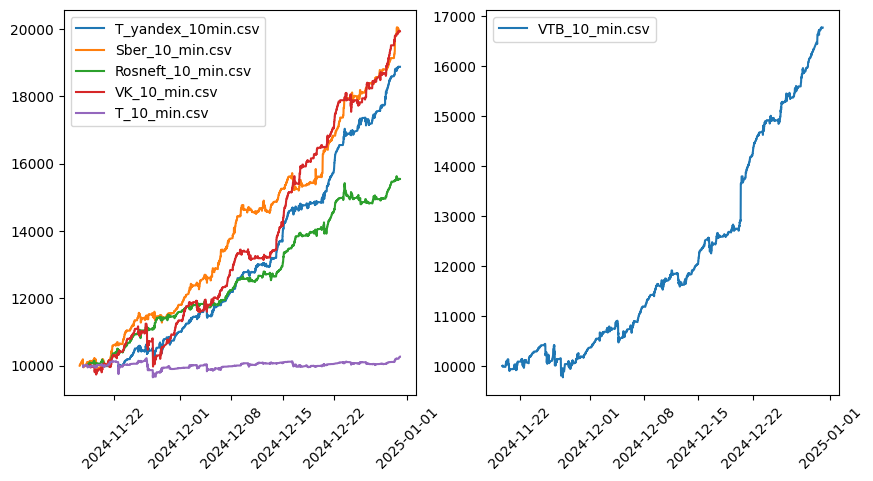

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i in range(6):
    stock = trading[i]
    history = dicts[i]
    history = history[history["datetime"] > "2024-07-01"]
    if stock[:3] == 'VTB':
        ax[1].plot(history['datetime'], history['budget'], label=stock)
        # ax[1].set_xtickslabels(rotation = 45)
        # ax[1].xticks
    else:
        ax[0].plot(history['datetime'], history['budget'], label=stock)
        # ax[0].set_xtickslabels(rotation = 45)
# ax[0].set_xticks(history['datetime'][::100], rotation=45)
# ax[0].set_xticks(history[::100])
ax[0].set_xticklabels(ax[0].get_xticklabels(),  rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(),  rotation=45)
ax[0].legend()
ax[1].legend()
plt.show()

In [98]:
accuracy_list = []
datasets = ['Yandex_10_min.csv', 'VTB_10_min.csv', 'Sber_10_min.csv', 'Rosneft_10_min.csv', 'VK_10_min.csv', 'T_10_min.csv']

for stock in datasets:
    data = FinData("../../datasets/" + stock)
    data.insert_shifts_norms([3, 6, 18])
    data.insert_rolling_means()
    data.insert_exp_rolling_means()
    data.insert_stochastic_oscillator()
    data.insert_high_low_diff()
    # data.insert_butter_filter()
    print(stock)

    args = {"iterations" : 10000, 
                "depth" : 5, 
                "learning_rate" : 0.01,
                "use_best_model" : True, 
                "l2_leaf_reg" : 200,
                "verbose" : False, 
                "loss_function" : 'Logloss', 
                "eval_metric" : 'Logloss', 
                "cat_features" : data.cat_features, 
                "random_state" : 42,
                "early_stopping_rounds" : 2000}
    model = CatboostFinModel(args)

    st_dt = dt.datetime(2024, 7, 1)
    end_dt = dt.datetime(2024, 12, 31)

    accuracy_list.append(model.test_weekly(data.df, start_dt=st_dt, end_dt=end_dt, cat=data.cat_features, num = data.numeric_features))

Yandex_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:383: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.5773639678749884 low_normed_ma_6
1.5978139364429382 low_norms_18
1.7377160309546786 close_normed_hl_diff_6
1.7405649569127937 high_norms_3
1.8109818288575699 close_high_norms_3
1.9969459553117033 close_normed_stochastic_oscillator_ma_18
2.057962714023531 close_norms_3
2.120590605374988 high_normed_ma_18
2.1454844990553457 low_normed_ma_18
2.16546800045328 low_normed_ma_3
2.6291323185586637 low_norms_6
2.6888665636909286 close_normed_ema_18
3.042580454203606 high_normed_ma_3
3.7858016981075417 high_normed_ma_6
4.5596057992538945 close_normed_ma_18
6.084898035471312 close_normed_ma_6
7.688388937589679 close_normed_ma_3
8.234750933281521 close_normed_ema_3
9.110441531414551 close_normed_ema_6
16.855693593783204 volume
VTB_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:383: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.846949397209586 low_normed_ma_6
1.9038661996088622 close_normed_ema_18
2.023957390822823 close_normed_hl_diff_3
2.149562384472773 low_norms_6
2.2510446407779727 close_normed_hl_diff_18
2.368072089726689 close_normed_stochastic_oscillator_ma_6
2.5616244562758217 close_normed_hl_diff_6
2.582248776578832 close_normed_stochastic_oscillator_ma_18
2.640773795484626 high_normed_ma_6
2.6481728968090534 high_norms_18
2.8087803353304115 low_norms_3
2.812267578779883 close_normed_stochastic_oscillator_ma_3
2.845972859348744 close_normed_stochastic_oscillator
3.211057604212418 close_normed_ma_6
3.6754866103712183 low_normed_ma_3
5.199371672593101 close_normed_ma_3
5.26740721403012 close_normed_ema_6
5.427063377954169 high_normed_ma_3
9.16150901737973 close_normed_ema_3
15.11119588515673 volume
Sber_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:383: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.5119516320362776 low_norms_18
1.6952944907380683 close_high_norms_3
1.7544842204665259 low_norms_6
1.8573998013160868 close_normed_stochastic_oscillator_ma_6
1.93333535711797 high_norms_3
2.013306978010413 close_norms_3
2.0977675525495427 close_normed_stochastic_oscillator_ma_18
2.128486379639757 close_normed_hl_diff_3
2.1798519781652668 low_norms_3
2.2452736476793556 low_normed_ma_6
2.8461673798839704 high_normed_ma_6
2.8514656353458983 close_normed_ma_18
2.9258722411675007 close_normed_ema_18
3.1056113315008633 close_normed_ma_6
3.4681091709406435 low_normed_ma_3
3.954425305353845 close_normed_ema_6
5.696656154388244 high_normed_ma_3
6.425062538449609 close_normed_ma_3
12.743592392362762 close_normed_ema_3
20.469211043685693 volume
Rosneft_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:383: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.850698598249881 close_high_norms_3
1.8589619076326593 close_normed_stochastic_oscillator
1.9330138056498753 close_normed_hl_diff_18
2.0593436217727827 low_norms_3
2.199322642662033 low_normed_ma_3
2.4466341787619337 close_normed_stochastic_oscillator_ma_18
2.6256596986792884 high_norms_6
2.7255114054063196 close_normed_stochastic_oscillator_ma_6
2.7390458887072815 close_normed_ma_18
2.821863195141882 high_normed_ma_18
2.8585122877415405 close_normed_ma_6
2.9178188175160216 high_norms_3
3.262210672555623 low_normed_ma_6
3.4470132973365533 close_normed_ema_18
4.188010621538029 close_normed_ema_6
4.483885657288116 high_normed_ma_6
5.5205078394434794 high_normed_ma_3
5.783107113587967 close_normed_ma_3
8.9193122139775 close_normed_ema_3
15.239719695756845 volume
VK_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:383: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.7111246578139467 high_normed_ma_18
1.7895848362987337 close_normed_hl_diff_6
1.869153338625685 close_high_norms_6
1.9625781258678094 low_norms_6
1.9800709080007255 close_norms_6
1.981746395424705 high_norms_18
2.111487388405343 low_normed_ma_18
2.446336369932125 close_normed_hl_diff_18
2.461986064563104 low_normed_ma_6
2.621518149046482 close_normed_stochastic_oscillator
2.7343003752877535 close_normed_ema_18
3.4068800682266054 high_normed_ma_6
3.996152256303304 low_normed_ma_3
4.316176913745643 close_normed_ma_18
4.642161310418837 close_normed_ma_6
5.77549212902494 close_normed_ema_6
6.083154661450746 close_normed_ma_3
6.15492622134936 high_normed_ma_3
10.055398717208831 close_normed_ema_3
12.986249074855815 volume
T_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:383: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.4735039341427423 hl_diff_6
1.487455745691679 low_norms_18
1.5653012367392038 close_high_norms_18
1.5866739603713276 close_normed_ma_18
1.6616936602724575 close_high_norms_3
1.711252943444663 close_normed_hl_diff_18
1.7914691095316486 close_normed_hl_diff_3
2.1320359045445945 high_norms_3
2.1996187372127585 close_normed_hl_diff_6
2.34124485959685 high_normed_ma_18
2.441533063533237 high_norms_18
3.0780528373771094 low_normed_ma_3
3.547495852953168 low_normed_ma_6
3.9295813326683735 close_normed_ema_6
5.584278508045862 close_normed_ma_6
5.930439631734253 volume
5.93214850521223 close_normed_ma_3
6.62443859664991 high_normed_ma_6
7.251530208565883 high_normed_ma_3
20.90367344121454 close_normed_ema_3


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Yandex_10_min.csv'),
  Text(1, 0, 'VTB_10_min.csv'),
  Text(2, 0, 'Sber_10_min.csv'),
  Text(3, 0, 'Rosneft_10_min.csv'),
  Text(4, 0, 'VK_10_min.csv'),
  Text(5, 0, 'T_10_min.csv')])

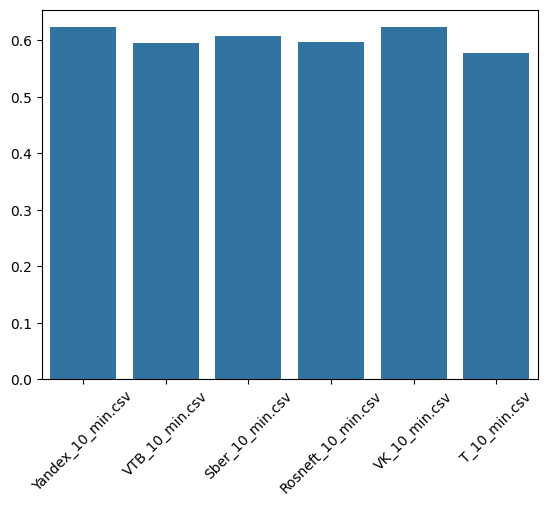

In [99]:
sns.barplot(x = datasets, y = accuracy_list)
plt.xticks(rotation=45)

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:430: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.5949027	test: 0.5656566	best: 0.5656566 (0)	total: 7.22ms	remaining: 1m 12s
200:	learn: 0.6291080	test: 0.5656566	best: 0.5757576 (43)	total: 1.05s	remaining: 51.3s
400:	learn: 0.6539235	test: 0.5858586	best: 0.5959596 (392)	total: 1.96s	remaining: 46.9s
600:	learn: 0.6867874	test: 0.6111111	best: 0.6111111 (492)	total: 2.76s	remaining: 43.2s
800:	learn: 0.7149564	test: 0.6212121	best: 0.6212121 (799)	total: 3.64s	remaining: 41.8s
1000:	learn: 0.7330651	test: 0.6060606	best: 0.6212121 (799)	total: 4.44s	remaining: 39.9s
1200:	learn: 0.7498323	test: 0.6161616	best: 0.6212121 (799)	total: 5.24s	remaining: 38.4s
1400:	learn: 0.7679410	test: 0.6161616	best: 0.6212121 (799)	total: 6.26s	remaining: 38.4s
1600:	learn: 0.7800134	test: 0.6111111	best: 0.6212121 (799)	total: 7.13s	remaining: 37.4s
1800:	learn: 0.7920858	test: 0.6010101	best: 0.6212121 (799)	total: 8.02s	remaining: 36.5s
2000:	learn: 0.8088531	test: 0.6010101	best: 0.6212121 (799)	total: 8.84s	remaining: 35.3s
2200:	l

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:430: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.6152815	test: 0.5151515	best: 0.5151515 (0)	total: 5.15ms	remaining: 51.5s
200:	learn: 0.6621984	test: 0.5000000	best: 0.5404040 (3)	total: 826ms	remaining: 40.3s
400:	learn: 0.6863271	test: 0.5252525	best: 0.5404040 (3)	total: 1.64s	remaining: 39.3s
600:	learn: 0.7198391	test: 0.5252525	best: 0.5404040 (3)	total: 2.43s	remaining: 38.1s
800:	learn: 0.7325737	test: 0.5252525	best: 0.5404040 (3)	total: 3.18s	remaining: 36.5s
1000:	learn: 0.7520107	test: 0.5303030	best: 0.5404040 (3)	total: 3.9s	remaining: 35.1s
1200:	learn: 0.7680965	test: 0.5454545	best: 0.5454545 (1200)	total: 4.63s	remaining: 33.9s
1400:	learn: 0.7861930	test: 0.5505051	best: 0.5505051 (1275)	total: 5.39s	remaining: 33.1s
1600:	learn: 0.7949062	test: 0.5505051	best: 0.5505051 (1275)	total: 6.14s	remaining: 32.2s
1800:	learn: 0.7989276	test: 0.5454545	best: 0.5505051 (1275)	total: 6.94s	remaining: 31.6s
2000:	learn: 0.8076408	test: 0.5454545	best: 0.5505051 (1275)	total: 7.87s	remaining: 31.5s
2200:	learn: 

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:430: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.6172922	test: 0.5505051	best: 0.5505051 (0)	total: 4.31ms	remaining: 43.1s
200:	learn: 0.6682306	test: 0.5555556	best: 0.5808081 (1)	total: 824ms	remaining: 40.2s
400:	learn: 0.6963807	test: 0.5303030	best: 0.5808081 (1)	total: 1.7s	remaining: 40.8s
600:	learn: 0.7205094	test: 0.5151515	best: 0.5808081 (1)	total: 2.45s	remaining: 38.4s
800:	learn: 0.7412869	test: 0.5000000	best: 0.5808081 (1)	total: 3.33s	remaining: 38.2s
1000:	learn: 0.7620643	test: 0.5202020	best: 0.5808081 (1)	total: 4.19s	remaining: 37.6s
1200:	learn: 0.7815013	test: 0.5050505	best: 0.5808081 (1)	total: 4.86s	remaining: 35.6s
1400:	learn: 0.7962466	test: 0.5050505	best: 0.5808081 (1)	total: 5.57s	remaining: 34.2s
1600:	learn: 0.8096515	test: 0.5202020	best: 0.5808081 (1)	total: 6.38s	remaining: 33.5s
1800:	learn: 0.8223861	test: 0.5101010	best: 0.5808081 (1)	total: 7.27s	remaining: 33.1s
2000:	learn: 0.8357909	test: 0.5202020	best: 0.5808081 (1)	total: 8.01s	remaining: 32s
Stopped by overfitting detecto

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:430: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.6085791	test: 0.5303030	best: 0.5303030 (0)	total: 5.15ms	remaining: 51.5s
200:	learn: 0.6575067	test: 0.5757576	best: 0.6060606 (78)	total: 1.01s	remaining: 49.1s
400:	learn: 0.6802949	test: 0.5858586	best: 0.6060606 (78)	total: 2.17s	remaining: 51.9s
600:	learn: 0.7030831	test: 0.5808081	best: 0.6060606 (78)	total: 3.37s	remaining: 52.8s
800:	learn: 0.7319035	test: 0.5606061	best: 0.6060606 (78)	total: 4.65s	remaining: 53.4s
1000:	learn: 0.7540214	test: 0.5606061	best: 0.6060606 (78)	total: 5.76s	remaining: 51.8s
1200:	learn: 0.7754692	test: 0.5454545	best: 0.6060606 (78)	total: 6.8s	remaining: 49.8s
1400:	learn: 0.7942359	test: 0.5454545	best: 0.6060606 (78)	total: 7.81s	remaining: 48s
1600:	learn: 0.8130027	test: 0.5353535	best: 0.6060606 (78)	total: 9.03s	remaining: 47.4s
1800:	learn: 0.8257373	test: 0.5252525	best: 0.6060606 (78)	total: 10.3s	remaining: 46.9s
2000:	learn: 0.8384718	test: 0.5252525	best: 0.6060606 (78)	total: 11.3s	remaining: 45s
Stopped by overfitting

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:430: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.6197183	test: 0.5757576	best: 0.5757576 (0)	total: 3.67ms	remaining: 36.7s
200:	learn: 0.6579477	test: 0.5909091	best: 0.6111111 (125)	total: 702ms	remaining: 34.2s
400:	learn: 0.6814219	test: 0.5909091	best: 0.6111111 (125)	total: 1.48s	remaining: 35.4s
600:	learn: 0.7028840	test: 0.5858586	best: 0.6111111 (125)	total: 2.41s	remaining: 37.7s
800:	learn: 0.7303823	test: 0.5707071	best: 0.6111111 (125)	total: 3.16s	remaining: 36.3s
1000:	learn: 0.7484909	test: 0.5757576	best: 0.6111111 (125)	total: 3.87s	remaining: 34.8s
1200:	learn: 0.7712944	test: 0.5656566	best: 0.6111111 (125)	total: 4.58s	remaining: 33.6s
1400:	learn: 0.7880617	test: 0.5656566	best: 0.6111111 (125)	total: 5.32s	remaining: 32.6s
1600:	learn: 0.8001341	test: 0.5505051	best: 0.6111111 (125)	total: 5.99s	remaining: 31.4s
1800:	learn: 0.8095238	test: 0.5505051	best: 0.6111111 (125)	total: 6.85s	remaining: 31.2s
2000:	learn: 0.8229376	test: 0.5505051	best: 0.6111111 (125)	total: 7.56s	remaining: 30.2s
Stopped

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:430: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.5797587	test: 0.5151515	best: 0.5151515 (0)	total: 3.89ms	remaining: 38.9s
200:	learn: 0.6407507	test: 0.5656566	best: 0.5959596 (5)	total: 750ms	remaining: 36.5s
400:	learn: 0.6682306	test: 0.5757576	best: 0.5959596 (5)	total: 1.5s	remaining: 36s
600:	learn: 0.6936997	test: 0.5656566	best: 0.5959596 (5)	total: 2.23s	remaining: 34.8s
800:	learn: 0.7205094	test: 0.5656566	best: 0.5959596 (5)	total: 2.95s	remaining: 33.8s
1000:	learn: 0.7432976	test: 0.5606061	best: 0.5959596 (5)	total: 3.75s	remaining: 33.7s
1200:	learn: 0.7660858	test: 0.5808081	best: 0.5959596 (5)	total: 4.45s	remaining: 32.6s
1400:	learn: 0.7868633	test: 0.5757576	best: 0.5959596 (5)	total: 5.34s	remaining: 32.8s
1600:	learn: 0.8096515	test: 0.5808081	best: 0.5959596 (5)	total: 6.06s	remaining: 31.8s
1800:	learn: 0.8203753	test: 0.5808081	best: 0.5959596 (5)	total: 6.77s	remaining: 30.8s
2000:	learn: 0.8297587	test: 0.5757576	best: 0.5959596 (5)	total: 7.58s	remaining: 30.3s
Stopped by overfitting detecto

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Yandex_10_min.csv'),
  Text(1, 0, 'VTB_10_min.csv'),
  Text(2, 0, 'Sber_10_min.csv'),
  Text(3, 0, 'Rosneft_10_min.csv'),
  Text(4, 0, 'VK_10_min.csv'),
  Text(5, 0, 'T_10_min.csv')])

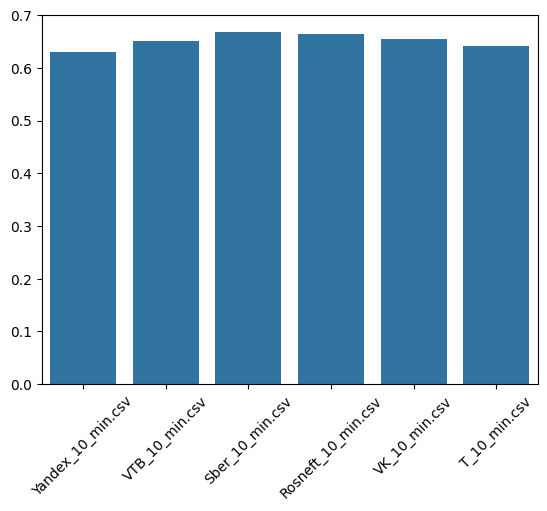

In [ ]:
accuracy_list = []
datasets = ['Yandex_10_min.csv', 'VTB_10_min.csv', 'Sber_10_min.csv', 'Rosneft_10_min.csv', 'VK_10_min.csv', 'T_10_min.csv']

for stock in datasets:
    data = FinData("../../datasets/" + stock)
    data.insert_shifts_norms([3, 6, 18])
    data.insert_rolling_means()
    data.insert_exp_rolling_means()
    data.insert_stochastic_oscillator()
    data.insert_high_low_diff()
    # data.insert_butter_filter()

    args = {"iterations" : 10000, 
                "depth" : 5, 
                "learning_rate" : 0.01,
                "use_best_model" : True, 
                "l2_leaf_reg" : 200,
                "verbose" : 200, 
                "loss_function" : 'CrossEntropy', 
                "eval_metric" : 'Accuracy', 
                "cat_features" : data.cat_features, 
                "random_state" : 42,
                "early_stopping_rounds" : 2000}
    model = CatboostFinModel(args)

    st_dt = dt.datetime(2024, 9, 1)
    end_dt = dt.datetime(2024, 9, 30)

    accuracy_list.append(model.test_intersect(data.df, start_dt=st_dt, end_dt=end_dt, cat=data.cat_features, num = data.numeric_features))

sns.barplot(x = datasets, y = accuracy_list)
plt.xticks(rotation=45)